In [40]:
import pandas as pd
import collections
import heapq
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# From SageMaker local
pathQ1 = 'data/GMU_Procurement_Data_FY20Q1_Clean2.csv'
pathQ2 = 'data/GMU_Procurement_Data_FY20Q2_Clean2.csv'
pathQ3 = 'data/GMU_Procurement_Data_FY20Q3_Clean.csv'
pathQ4 = 'data/GMU_Procurement_Data_FY20Q4_2_Clean2.csv'

In [4]:
dfQ1 = pd.read_csv(pathQ1)
dfQ2 = pd.read_csv(pathQ2)
dfQ3 = pd.read_csv(pathQ3)
dfQ4 = pd.read_csv(pathQ4)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
Q1_PSC_cnt = dfQ1.groupby('PSC_CODE').size().to_dict()
Q2_PSC_cnt = dfQ2.groupby('PSC_CODE').size().to_dict()
Q3_PSC_cnt = dfQ3.groupby('PSC_CODE').size().to_dict()
Q4_PSC_cnt = dfQ4.groupby('PSC_CODE').size().to_dict()

In [28]:
## get if there is any unique PSC for certain quarter
uniqueQ1 = []
uniqueQ2 = []
uniqueQ3 = []
uniqueQ4 = []

In [87]:
for key, value in Q1_PSC_cnt.items():
    if key not in Q2_PSC_cnt:
        if key not in Q3_PSC_cnt:
            if key not in Q4_PSC_cnt:
                uniqueQ1.append(key)

for key, value in Q2_PSC_cnt.items():
    if key not in Q1_PSC_cnt:
        if key not in Q3_PSC_cnt:
            if key not in Q4_PSC_cnt:
                uniqueQ2.append(key)
                
for key, value in Q3_PSC_cnt.items():
    if key not in Q2_PSC_cnt:
        if key not in Q1_PSC_cnt:
            if key not in Q4_PSC_cnt:
                uniqueQ3.append(key)
                
for key, value in Q4_PSC_cnt.items():
    if key not in Q2_PSC_cnt:
        if key not in Q3_PSC_cnt:
            if key not in Q1_PSC_cnt:
                uniqueQ4.append(key)


In [88]:
dictUNQ_Q1 = {}
dictUNQ_Q2 = {}
dictUNQ_Q3 = {}
dictUNQ_Q4 = {}


In [90]:
for a in uniqueQ1:
    dictUNQ_Q1[a] = Q1_PSC_cnt[a]
dictUNQ_Q1 = sorted(dictUNQ_Q1.items(), key=lambda x: x[1], reverse=True)
dictUNQ_Q1

[('AS21', 86),
 ('AK14', 36),
 ('AD23', 21),
 ('J010', 21),
 ('Q527', 16),
 ('N024', 12),
 ('K065', 10),
 ('J032', 8),
 ('9650', 6),
 ('L010', 6),
 ('H918', 4),
 ('K085', 4),
 ('8950', 3),
 ('X1BD', 3),
 ('1020', 2),
 ('H219', 2),
 ('H978', 2),
 ('K077', 2),
 ('K078', 2),
 ('K093', 2),
 ('Q505', 2),
 ('Q524', 2),
 ('W043', 2),
 ('Y239', 2),
 ('H151', 1),
 ('H910', 1),
 ('Q515', 1),
 ('Q516', 1)]

In [92]:
for a in uniqueQ2:
    dictUNQ_Q2[a] = Q2_PSC_cnt[a]
dictUNQ_Q2 = sorted(dictUNQ_Q2.items(), key=lambda x: x[1], reverse=True)
dictUNQ_Q2

[('H155', 52),
 ('W095', 32),
 ('3611', 12),
 ('1376', 8),
 ('Y1DZ', 6),
 ('8905', 5),
 ('1990', 4),
 ('H130', 4),
 ('Q504', 4),
 ('Z169', 4),
 ('H231', 3),
 ('H310', 3),
 ('L078', 3),
 ('P300', 3),
 ('1250', 2),
 ('H137', 2),
 ('H213', 2),
 ('H316', 2),
 ('H354', 2),
 ('H369', 2),
 ('L018', 2),
 ('L054', 2),
 ('N016', 2),
 ('R419', 2),
 ('W087', 2),
 ('Z1KC', 2),
 ('1080', 1),
 ('7642', 1),
 ('H154', 1),
 ('H948', 1),
 ('K066', 1),
 ('Q513', 1),
 ('Q521', 1),
 ('R199', 1),
 ('R709', 1),
 ('W047', 1),
 ('Z2DB', 1),
 ('Z2NA', 1)]

In [93]:
for a in uniqueQ3:
    dictUNQ_Q3[a] = Q3_PSC_cnt[a]
dictUNQ_Q3 = sorted(dictUNQ_Q3.items(), key=lambda x: x[1], reverse=True)
dictUNQ_Q3

[('M179', 339),
 ('Y1NA', 39),
 ('W026', 12),
 ('F015', 10),
 ('H355', 9),
 ('L017', 9),
 ('AD97', 5),
 ('1370', 4),
 ('AT95', 3),
 ('AZ13', 3),
 ('H315', 3),
 ('Q508', 3),
 ('1930', 2),
 ('1935', 2),
 ('3690', 1),
 ('C1NC', 1),
 ('N085', 1)]

In [94]:
for a in uniqueQ4:
    dictUNQ_Q4[a] = Q4_PSC_cnt[a]
dictUNQ_Q4 = sorted(dictUNQ_Q4.items(), key=lambda x: x[1], reverse=True)
dictUNQ_Q4

[('STND', 39499),
 ('AK11', 132),
 ('Z1PC', 55),
 ('X174', 28),
 ('K060', 24),
 ('Y1LZ', 21),
 ('6010', 20),
 ('AB96', 20),
 ('K051', 19),
 ('5811', 14),
 ('AC65', 10),
 ('T014', 6),
 ('AN91', 5),
 ('K069', 4),
 ('L087', 4),
 ('P999', 4),
 ('3815', 3),
 ('AJ43', 3),
 ('1270', 2),
 ('2915', 2),
 ('C1PD', 2),
 ('H193', 2),
 ('L051', 2),
 ('M1ND', 2),
 ('Y1FF', 2),
 ('1630', 1),
 ('1915', 1),
 ('3436', 1),
 ('H161', 1),
 ('H387', 1),
 ('K019', 1),
 ('L012', 1),
 ('Q523', 1),
 ('X1GA', 1)]

In [52]:
## get if there is high value PSC for certain quarter
Q1PSC_Top10_A = dict()
Q2PSC_Top10_A = dict()
Q3PSC_Top10_A = dict()
Q4PSC_Top10_A = dict()

In [43]:
Q1PSC_sorted_dict = sorted(Q1_PSC_cnt.items(), key=lambda x: x[1], reverse=True)
Q2PSC_sorted_dict = sorted(Q2_PSC_cnt.items(), key=lambda x: x[1], reverse=True)
Q3PSC_sorted_dict = sorted(Q3_PSC_cnt.items(), key=lambda x: x[1], reverse=True)
Q4PSC_sorted_dict = sorted(Q4_PSC_cnt.items(), key=lambda x: x[1], reverse=True)

In [59]:
Q1PSC_Top10_D = dict(Q1PSC_sorted_dict[:10])
Q2PSC_Top10_D = dict(Q2PSC_sorted_dict[:10])
Q3PSC_Top10_D = dict(Q3PSC_sorted_dict[:10])
Q4PSC_Top10_D = dict(Q4PSC_sorted_dict[:10])

<BarContainer object of 10 artists>

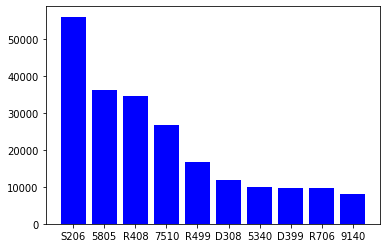

In [81]:
plt.bar(Q1PSC_Top10_D.keys(), Q1PSC_Top10_D.values(), color='b')

<BarContainer object of 10 artists>

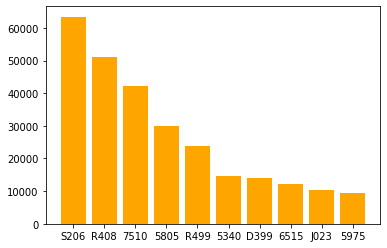

In [86]:
plt.bar(Q2PSC_Top10_D.keys(), Q2PSC_Top10_D.values(), color='orange')

<BarContainer object of 10 artists>

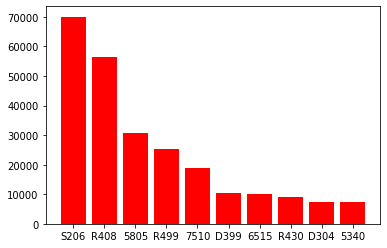

In [84]:
plt.bar(Q3PSC_Top10_D.keys(), Q3PSC_Top10_D.values(), color='r')

<BarContainer object of 10 artists>

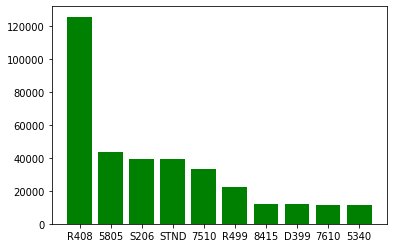

In [83]:
plt.bar(Q4PSC_Top10_D.keys(), Q4PSC_Top10_D.values(), color='g')